In [128]:
import pandas as pd

In [129]:
df = pd.read_csv("/content/noisy_covid_data.csv")
print(df)


            Country        State  Confirmed  Deaths  Recovered        Date
0            Russia       Berlin     1486.0     NaN    50392.0  2022-05-07
1            France     New York    24762.0  2656.0    51021.0  2022-01-29
2    United Kingdom    Karnataka    27613.0  4875.0    18420.0  2021-07-20
3     United States      Florida     4196.0  2299.0    17202.0  2022-07-04
4            Russia       Moscow        NaN  3882.0     2394.0  2021-12-21
..              ...          ...        ...     ...        ...         ...
995   United States       Moscow    60372.0  3497.0     4800.0  2020-11-17
996           India  Maharashtra        NaN  3860.0     3838.0  2022-09-01
997         Germany   California    54863.0     NaN    63101.0  2020-03-06
998           India     New York    90941.0   900.0        NaN  2022-04-22
999          France  Maharashtra    39737.0  2075.0    36782.0  2021-07-10

[1000 rows x 6 columns]


# ***USE CASE 1***

## **CHECKING OF FEW ROWS & DATA TYPES**

In [130]:
df.head()

,Country,State,Confirmed,Deaths,Recovered,Date
0,Russia,Berlin,1486.0,NaN,50392.0,2022-05-07
1,France,New York,24762.0,2656.0,51021.0,2022-01-29
2,United Kingdom,Karnataka,27613.0,4875.0,18420.0,2021-07-20
3,United States,Florida,4196.0,2299.0,17202.0,2022-07-04
4,Russia,Moscow,NaN,3882.0,2394.0,2021-12-21


In [131]:
df['Deaths'].astype(int,errors = "ignore")

,Deaths
0,NaN
1,2656.0
2,4875.0
3,2299.0
4,3882.0
...,...
995,3497.0
996,3860.0
997,NaN
998,900.0


In [132]:
df["Confirmed"].astype(str)

,Confirmed
0,1486.0
1,24762.0
2,27613.0
3,4196.0
4,nan
...,...
995,60372.0
996,nan
997,54863.0
998,90941.0


# **FILLING MISSING VALUES WITH ZERO**

In [133]:
df.fillna(0)

,Country,State,Confirmed,Deaths,Recovered,Date
0,Russia,Berlin,1486.0,0.0,50392.0,2022-05-07
1,France,New York,24762.0,2656.0,51021.0,2022-01-29
2,United Kingdom,Karnataka,27613.0,4875.0,18420.0,2021-07-20
3,United States,Florida,4196.0,2299.0,17202.0,2022-07-04
4,Russia,Moscow,0.0,3882.0,2394.0,2021-12-21
...,...,...,...,...,...,...
995,United States,Moscow,60372.0,3497.0,4800.0,2020-11-17
996,India,Maharashtra,0.0,3860.0,3838.0,2022-09-01
997,Germany,California,54863.0,0.0,63101.0,2020-03-06
998,India,New York,90941.0,900.0,0.0,2022-04-22


In [134]:
df.describe()

,Confirmed,Deaths,Recovered
count,900.000000,900.000000,900.000000
mean,56043.782222,2490.523333,35400.577778
std,61621.220858,1429.540547,20600.337195
min,1002.000000,17.000000,536.000000
25%,25720.000000,1243.750000,17531.500000
50%,52682.000000,2524.500000,35093.000000
75%,77178.000000,3787.500000,54226.250000
max,865970.000000,4998.000000,69885.000000


In [135]:
dr = df[df["Confirmed"]>500000]
print(dr)

    Country       State  Confirmed  Deaths  Recovered        Date
247   India      Moscow   851050.0  3140.0    11744.0  2021-09-27
353  Mexico      Berlin   575650.0  3158.0     8984.0  2020-10-08
492   India      London   865970.0   237.0    63098.0  2022-06-26
499   Spain       Paris   658570.0  1244.0    31366.0  2022-05-17
526   Italy  California   631750.0     NaN    48627.0  2021-08-25


# ***USE CASE 2***

# **GROUP DATA BY COUNTRY**

In [136]:
dr = df.groupby("Country").sum()
print(dr)

                                                            State  Confirmed  \
Country                                                                        
Brazil          KarnatakaFloridaKarnatakaMaharashtraMoscowLond...  5459110.0   
France          New YorkNew YorkParisMoscowBerlinParisParisPar...  4765469.0   
Germany         KarnatakaNew YorkCaliforniaMoscowBerlinLondonN...  4261936.0   
India           TexasLondonNew YorkMoscowBerlinMoscowMaharasht...  7464809.0   
Italy           KarnatakaParisNew YorkKarnatakaMoscowCaliforni...  4891820.0   
Mexico          ParisTexasNew YorkMoscowMaharashtraLondonNew Y...  5632946.0   
Russia          BerlinMoscowTexasCaliforniaMaharashtraMaharash...  4498728.0   
Spain           CaliforniaBerlinNew YorkFloridaBerlinCaliforni...  4614646.0   
United Kingdom  KarnatakaLondonMaharashtraCaliforniaTexasMosco...  4808425.0   
United States   FloridaLondonParisKarnatakaTexasLondonCaliforn...  4041515.0   

                  Deaths  Recovered  \


# **RANK CONFIRMED BY CASES**

In [137]:
dr.sort_values("Confirmed", ascending = False)

,State,Confirmed,Deaths,Recovered,Date
Country,,,,,
India,TexasLondonNew YorkMoscowBerlinMoscowMaharasht...,7464809.0,257437.0,3514596.0,2021-08-032022-08-272021-09-282022-03-272021-0...
Mexico,ParisTexasNew YorkMoscowMaharashtraLondonNew Y...,5632946.0,259871.0,4112546.0,2020-01-172021-11-132021-11-252021-06-162020-0...
Brazil,KarnatakaFloridaKarnatakaMaharashtraMoscowLond...,5459110.0,222424.0,3367134.0,2022-01-312022-09-252021-07-072020-12-182020-0...
Italy,KarnatakaParisNew YorkKarnatakaMoscowCaliforni...,4891820.0,270143.0,3055729.0,2020-05-122021-03-052021-10-112021-01-042022-0...
United Kingdom,KarnatakaLondonMaharashtraCaliforniaTexasMosco...,4808425.0,206574.0,3124525.0,2021-07-202021-02-052020-02-292022-06-172020-0...
France,New YorkNew YorkParisMoscowBerlinParisParisPar...,4765469.0,223333.0,2907060.0,2022-01-292020-03-082021-11-302020-04-062020-0...
Spain,CaliforniaBerlinNew YorkFloridaBerlinCaliforni...,4614646.0,165317.0,2419315.0,2020-11-032021-02-152020-07-202020-08-162022-0...
Russia,BerlinMoscowTexasCaliforniaMaharashtraMaharash...,4498728.0,200076.0,3267724.0,2022-05-072021-12-212020-06-222020-12-252022-0...
Germany,KarnatakaNew YorkCaliforniaMoscowBerlinLondonN...,4261936.0,210541.0,3172883.0,2020-06-022020-10-112020-05-042022-07-262020-0...


# **FATILITY RATE**

In [138]:
dr["Fatility"] = (dr["Deaths"]/dr["Confirmed"])*100
print(dr["Fatility"])

Country
Brazil            4.074364
France            4.686485
Germany           4.940032
India             3.448675
Italy             5.522341
Mexico            4.613412
Russia            4.447390
Spain             3.582442
United Kingdom    4.296084
United States     5.585900
Name: Fatility, dtype: float64


# ***USE CASE 3***

# **FILTER DATA BY COUNTRY**

In [139]:
r = df[df["Country"] == "India"]
print(r)

    Country        State  Confirmed  Deaths  Recovered        Date
29    India        Texas    32113.0  1005.0    11344.0  2021-08-03
30    India       London    16401.0  1197.0    51955.0  2022-08-27
55    India     New York    88858.0  1084.0    49563.0  2021-09-28
60    India       Moscow    51617.0  2643.0        NaN  2022-03-27
66    India       Berlin    76271.0   510.0    19391.0  2021-02-05
..      ...          ...        ...     ...        ...         ...
972   India       Moscow    45458.0  4577.0    53300.0  2020-10-03
975   India    Karnataka    89743.0     NaN    64815.0  2020-04-24
986   India       London    75921.0  1990.0    15790.0  2022-09-08
996   India  Maharashtra        NaN  3860.0     3838.0  2022-09-01
998   India     New York    90941.0   900.0        NaN  2022-04-22

[110 rows x 6 columns]


In [140]:
r.fillna(0)

,Country,State,Confirmed,Deaths,Recovered,Date
29,India,Texas,32113.0,1005.0,11344.0,2021-08-03
30,India,London,16401.0,1197.0,51955.0,2022-08-27
55,India,New York,88858.0,1084.0,49563.0,2021-09-28
60,India,Moscow,51617.0,2643.0,0.0,2022-03-27
66,India,Berlin,76271.0,510.0,19391.0,2021-02-05
...,...,...,...,...,...,...
972,India,Moscow,45458.0,4577.0,53300.0,2020-10-03
975,India,Karnataka,89743.0,0.0,64815.0,2020-04-24
986,India,London,75921.0,1990.0,15790.0,2022-09-08
996,India,Maharashtra,0.0,3860.0,3838.0,2022-09-01


# **GROUP BY DATE**

In [141]:
df.groupby(["Date","Confirmed","Recovered"])["Deaths"].sum()

Date        Confirmed  Recovered
2020-01-03  21431.0    12526.0      2586.0
            87268.0    34933.0      3977.0
2020-01-04  54260.0    49896.0       911.0
2020-01-05  33583.0    46202.0       339.0
2020-01-06  35568.0    2152.0       2676.0
                                     ...  
2022-09-25  71199.0    11138.0      1204.0
            80415.0    58423.0      3669.0
2022-09-26  28328.0    26809.0       526.0
            46708.0    63697.0      2810.0
            72492.0    18134.0      1123.0
Name: Deaths, Length: 814, dtype: float64

# **VISUALIZE TRENDS**

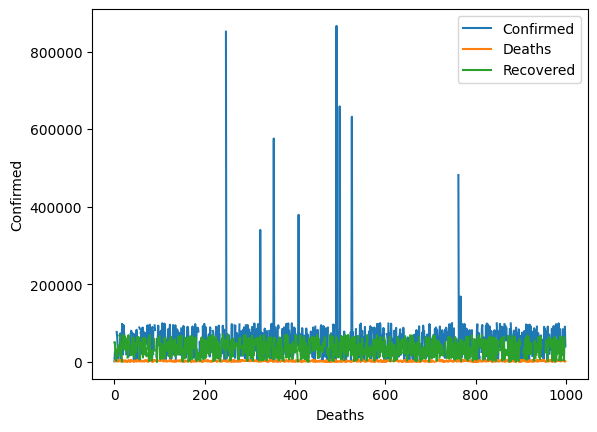

In [142]:
import matplotlib.pyplot as plt
df.plot(kind = "line")
plt.xlabel("Deaths")
plt.ylabel("Confirmed")
plt.show()


# ***USE CASE 4***

# **RESAMPLE DATA**

In [143]:
df["Date"] = pd.to_datetime(df["Date"])
w = df.resample("W", on  = "Date").sum()
print(w)

                                                      Country  \
Date                                                            
2020-01-05  IndiaUnited KingdomFranceSpainFranceUnited Sta...   
2020-01-12  MexicoUnited StatesRussiaUnited KingdomUnited ...   
2020-01-19  RussiaMexicoGermanyUnited KingdomFranceUnited ...   
2020-01-26  ItalyUnited KingdomIndiaMexicoUnited KingdomSpain   
2020-02-02             FranceBrazilFranceItalyIndiaSpainItaly   
...                                                       ...   
2022-09-04     IndiaUnited StatesIndiaBrazilIndiaBrazilFrance   
2022-09-11                   ItalyBrazilIndiaRussiaItalySpain   
2022-09-18            FranceItalyFranceFranceItalySpainBrazil   
2022-09-25  RussiaIndiaItalyMexicoUnited StatesFranceMexic...   
2022-10-02                                 RussiaRussiaBrazil   

                                                        State  Confirmed  \
Date                                                                       
20

# **CALCULATING THE ROLLING AVERAGE**

In [144]:
r = df.groupby(["Country","Date"])["Confirmed"].rolling(1).sum()
print(r)

Country        Date           
Brazil         2020-01-27  345    71658.0
               2020-02-04  801    25312.0
               2020-02-05  311    50228.0
               2020-02-16  835    79627.0
               2020-03-08  908    79561.0
                                   ...   
United States  2022-08-18  662     6192.0
               2022-08-20  753     1760.0
               2022-08-30  703    56728.0
               2022-09-23  678        NaN
               2022-09-24  173    91410.0
Name: Confirmed, Length: 1000, dtype: float64


In [145]:
r.fillna(0)

Country        Date           
Brazil         2020-01-27  345    71658.0
               2020-02-04  801    25312.0
               2020-02-05  311    50228.0
               2020-02-16  835    79627.0
               2020-03-08  908    79561.0
                                   ...   
United States  2022-08-18  662     6192.0
               2022-08-20  753     1760.0
               2022-08-30  703    56728.0
               2022-09-23  678        0.0
               2022-09-24  173    91410.0
Name: Confirmed, Length: 1000, dtype: float64

# **VISUALIZING THE ROLLING AVERAGE**

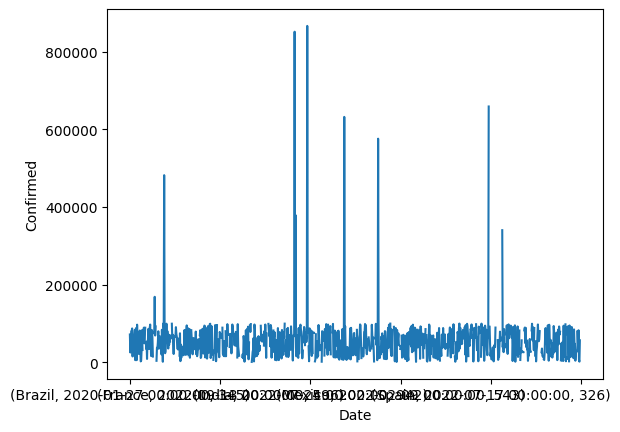

In [146]:
r.plot(kind = "line")
plt.xlabel("Date")
plt.ylabel("Confirmed")
plt.show()

# **USE CASE 5***

# **MERGING POPULATION DATA**

In [147]:
dd = pd.read_csv("/content/population_data.csv")
print(dd)

          Country  Population
0   United States   331002651
1           India  1380004385
2          Brazil   212559417
3          Russia   145934462
4          France    65273511
5  United Kingdom    67886011
6           Italy    60461826
7           Spain    46754778
8         Germany    83783942
9          Mexico   128932753


In [148]:
merdged = pd.merge(df, dd)
print(merdged)

    Country        State  Confirmed  Deaths  Recovered       Date  Population
0    Russia       Berlin     1486.0     NaN    50392.0 2022-05-07   145934462
1    Russia       Moscow        NaN  3882.0     2394.0 2021-12-21   145934462
2    Russia        Texas    73379.0  1159.0    57197.0 2020-06-22   145934462
3    Russia   California    58175.0  2664.0    63810.0 2020-12-25   145934462
4    Russia  Maharashtra    72492.0  1123.0    18134.0 2022-09-26   145934462
..      ...          ...        ...     ...        ...        ...         ...
995   India       Moscow    45458.0  4577.0    53300.0 2020-10-03  1380004385
996   India    Karnataka    89743.0     NaN    64815.0 2020-04-24  1380004385
997   India       London    75921.0  1990.0    15790.0 2022-09-08  1380004385
998   India  Maharashtra        NaN  3860.0     3838.0 2022-09-01  1380004385
999   India     New York    90941.0   900.0        NaN 2022-04-22  1380004385

[1000 rows x 7 columns]


# **CALCULATING CONFIRMED DEATHS BY COUNTRY**

In [149]:
merdged.groupby(["Country","Confirmed"])["Deaths"].sum()


Country        Confirmed
Brazil         1432.0       3641.0
               2312.0          0.0
               3889.0          0.0
               4262.0       2289.0
               5507.0       3119.0
                             ...  
United States  94823.0      2533.0
               95244.0      2191.0
               95924.0         0.0
               96696.0       699.0
               97798.0      3734.0
Name: Deaths, Length: 898, dtype: float64

# **RANK OF COUNTRIES BY CONFIRMED CASES**

In [150]:
merdged.sort_values("Confirmed", ascending = False)

,Country,State,Confirmed,Deaths,Recovered,Date,Population
941,India,London,865970.0,237.0,63098.0,2022-06-26,1380004385
910,India,Moscow,851050.0,3140.0,11744.0,2021-09-27,1380004385
664,Spain,Paris,658570.0,1244.0,31366.0,2022-05-17,46754778
576,Italy,California,631750.0,NaN,48627.0,2021-08-25,60461826
433,Mexico,Berlin,575650.0,3158.0,8984.0,2020-10-08,128932753
...,...,...,...,...,...,...,...
966,India,New York,NaN,3980.0,64082.0,2022-03-22,1380004385
967,India,London,NaN,4097.0,8676.0,2020-07-27,1380004385
984,India,Moscow,NaN,1853.0,55531.0,2020-02-24,1380004385
992,India,Karnataka,NaN,3180.0,NaN,2022-07-25,1380004385


# ***USE CASE 6***

# **SUMMARIZE KET METRICS**

In [151]:
dr.groupby(["Country","Confirmed","Deaths","Recovered"])["Fatility"].sum()

,,,,Fatility
Country,Confirmed,Deaths,Recovered,
Brazil,5459110.0,222424.0,3367134.0,4.074364
France,4765469.0,223333.0,2907060.0,4.686485
Germany,4261936.0,210541.0,3172883.0,4.940032
India,7464809.0,257437.0,3514596.0,3.448675
Italy,4891820.0,270143.0,3055729.0,5.522341
Mexico,5632946.0,259871.0,4112546.0,4.613412
Russia,4498728.0,200076.0,3267724.0,4.447390
Spain,4614646.0,165317.0,2419315.0,3.582442
United Kingdom,4808425.0,206574.0,3124525.0,4.296084


In [152]:
F = dr[["Confirmed","Recovered","Deaths","Fatility"]]
F.to_csv("Final Report", index = "True")
print(F.to_csv)

<bound method NDFrame.to_csv of                 Confirmed  Recovered    Deaths  Fatility
Country                                                 
Brazil          5459110.0  3367134.0  222424.0  4.074364
France          4765469.0  2907060.0  223333.0  4.686485
Germany         4261936.0  3172883.0  210541.0  4.940032
India           7464809.0  3514596.0  257437.0  3.448675
Italy           4891820.0  3055729.0  270143.0  5.522341
Mexico          5632946.0  4112546.0  259871.0  4.613412
Russia          4498728.0  3267724.0  200076.0  4.447390
Spain           4614646.0  2419315.0  165317.0  3.582442
United Kingdom  4808425.0  3124525.0  206574.0  4.296084
United States   4041515.0  2919008.0  225755.0  5.585900>
